<a href="https://colab.research.google.com/github/rain2624/Medical_cost_EDA/blob/main/Medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem:

**Our business case is to predict customer charges for an inusurance company. So that we can decide how much they charge people corectly.**

## 1.Imorting Libraries and dataset.

In [ ]:
# Let import necessay libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# Lets load our dataset:
df = pd.read_csv("insurance.csv")

## 2.Information about the data:

There are 7 variables in the dataset and information about each variable:
1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance


## 3.Introduction to the data

In [ ]:
# Lets look at the info about the column in dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

The dataset consist of 1338 rows and 7 columns

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include = 'O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## 4.Data cleaning:
In this part we will look at the following:
1. Missing values
2. Duplicated values

In [ ]:
# Missing Values/ NA values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Duplicate values
df[df.duplicated(keep = 'first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


There is only 1 row with duplicated values. Lets drop this row.

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

Data Visualization:
The following part will involve univariate, bivariate and multivariate analysis to see the distribution and relationhip between variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


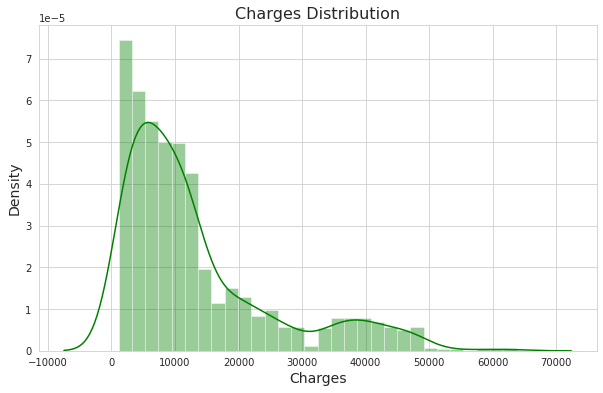

In [ ]:
# 1.Univariate Analysis:
# 1.1 Charges distribution:

plt.figure(figsize=(10,6))
sns.distplot(df.charges, color = 'g')
plt.title('Charges Distribution',size = 16)
plt.xlabel('Charges', size =14)
plt.ylabel('Density', size = 14)
plt.show()

**We can see from the above plot the distribution is right(positive) skewed. Most of he charges are in between 0 - 1000 dollars.**

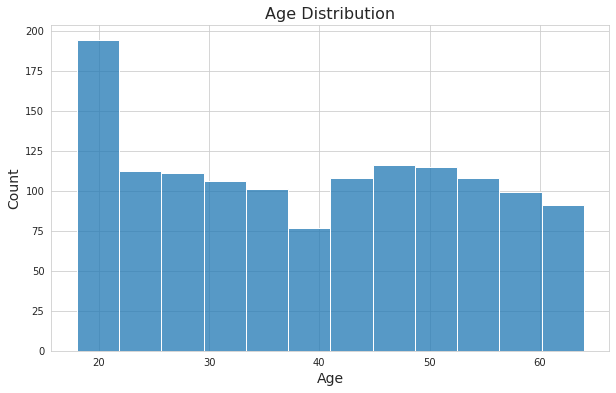

In [ ]:
# 1.2.Age:
plt.figure(figsize = (10,6))
sns.histplot(df.age)
plt.title('Age Distribution', size = 16)
plt.xlabel('Age', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

**Most of the customer ages are in between 18-19. The disribution looks like a uniform distribution.**

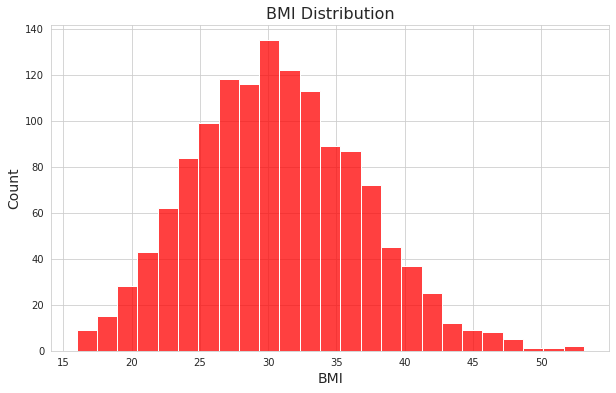

In [ ]:
# 1.3 BMI Distribution
plt.figure(figsize = (10,6))
sns.histplot(df.bmi, color = 'r')
plt.title("BMI Distribution", size = 16)
plt.xlabel("BMI", size = 14)
plt.ylabel("Count", size= 14)
plt.show()

**The distribution looks like a normal distribution and Bmi for most customers is around 27- 34**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


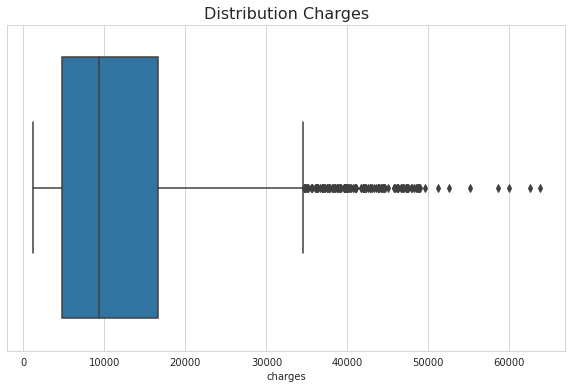

In [ ]:
#1.4 Boxplot for numerical values to check outliers:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges', size = 16)
plt.show()

**The boxplot shows that there are outliers in the dataset. Before removing any of them we need to examine or ask domain expert if they are anomalies or not.**

In [ ]:
#We can remove outliers using IQR methods
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

11911.37345


In [ ]:
#Lets check outliers:
outliers_df = df[(df['charges']< Q1-1.5*IQR) | (df['charges'] > Q3 + 1.5*IQR)]

In [ ]:
outliers_df.shape

(139, 7)

**We can easily detect outliers with the boxplot but we won't do anything with it and continue our analysis.**

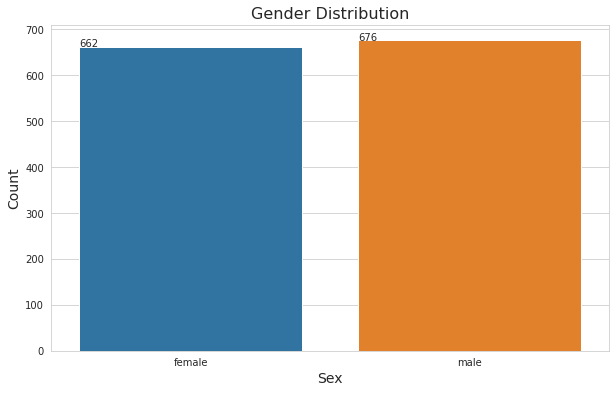

In [ ]:
# 2.Univariate Analysis for Categorical Features:
#2.1 Gender
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'sex', data = df)
for p in ax.patches:
   ax.annotate(p.get_height(), 
               (p.get_x(), p.get_height()))
plt.title('Gender Distribution', size = 16)
plt.xlabel('Sex', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

**There are almost similar rate of female customers as the male customers. Though, male cusomers are more in few numbers.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


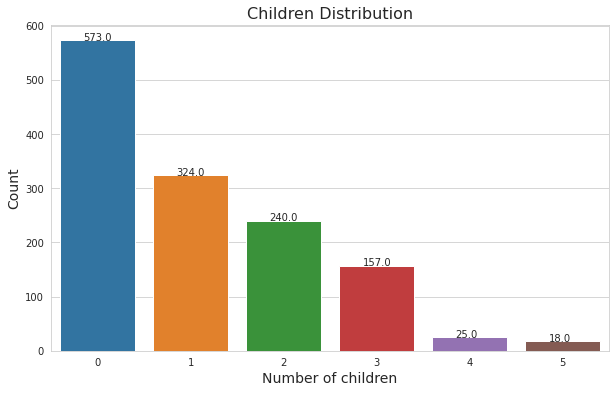

In [ ]:
# 2.2 Children 
plt.figure(figsize = (10,6))
ax = sns.countplot(df.children)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), 
              (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Children Distribution', size=16)
plt.xlabel('Number of children', size =14)
plt.ylabel('Count',size=14)
plt.show()

**The majority of the customers do not have any chidren. Few customers have 4-5 children.**

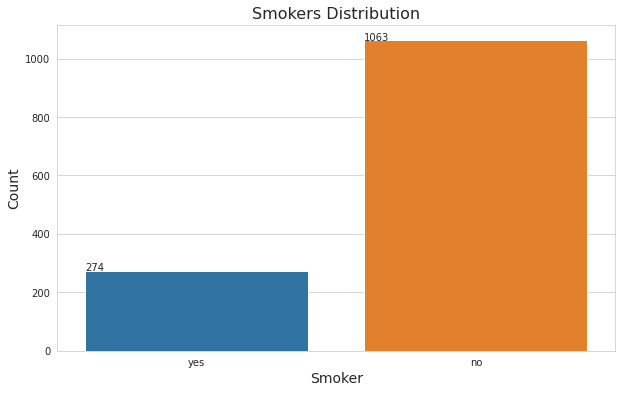

In [ ]:
# 2.3 Smokers
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'smoker', data = df)
for p in ax.patches:
   ax.annotate(p.get_height(), 
               (p.get_x(), p.get_height()))
plt.title('Smokers Distribution', size = 16)
plt.xlabel('Smoker', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

**The majority customers do not smoke.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


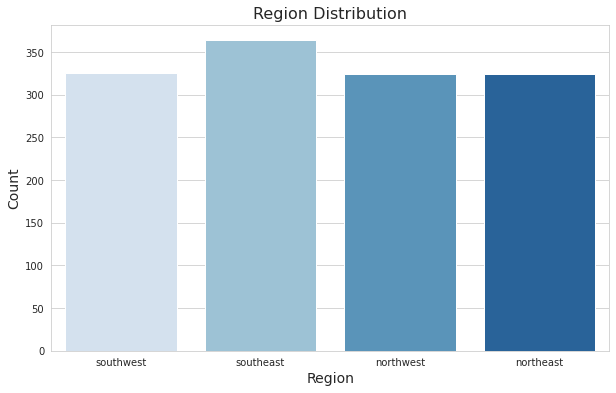

In [ ]:
# 2.4 Regions:
plt.figure(figsize = (10,6))
sns.countplot(df.region, palette = 'Blues')
plt.title('Region Distribution', size = 16)
plt.xlabel('Region', size =14)
plt.ylabel('Count',size =14)
plt.show()

**All the four regions are equally duistributed. The number of people in southeast is slightly more than others.**

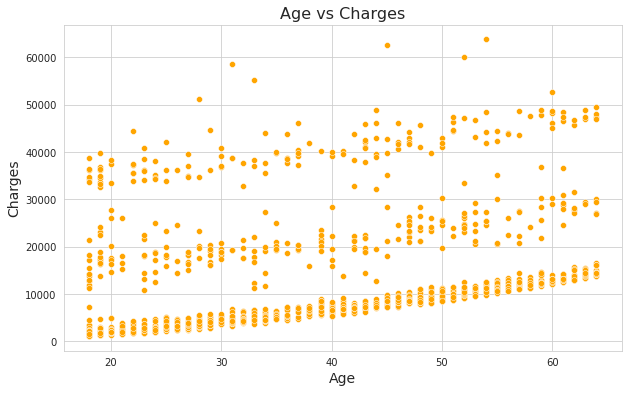

In [ ]:
# 3.Bivariate Analysis
#3.1 Age vs Charges:
plt.figure(figsize = (10,6))
sns.scatterplot(x='age', y='charges', color = 'orange',data=df)
plt.title('Age vs Charges', size = 16)
plt.xlabel('Age', size = 14)
plt.ylabel('Charges', size = 14)
plt.show()

**The above scatterplot shows a weak postive relationship beween the variables. As the age increases charges also slightly increases.**

In [ ]:
# Lets check the correlation between the 2 variables:
print("Correlation between age and charges is:{}".format(round(df.corr()['age']['charges'],2)))

Correlation between age and charges is:0.3


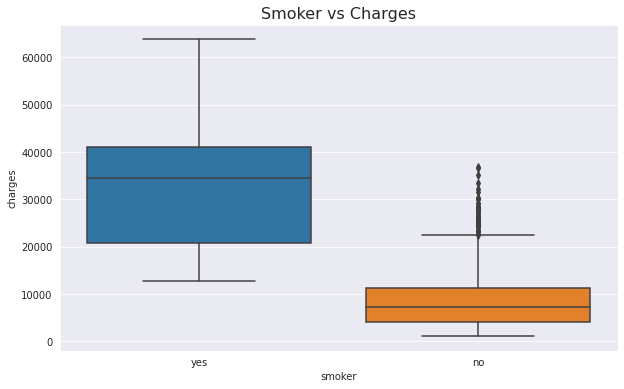

In [ ]:
# Smokers vs Charges:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker', y='charges',data=df)
plt.title('Smoker vs Charges', size = 16)
plt.show()

**The above boxplot shows that cost of insurance for smokers is higher than or non-smokers.**

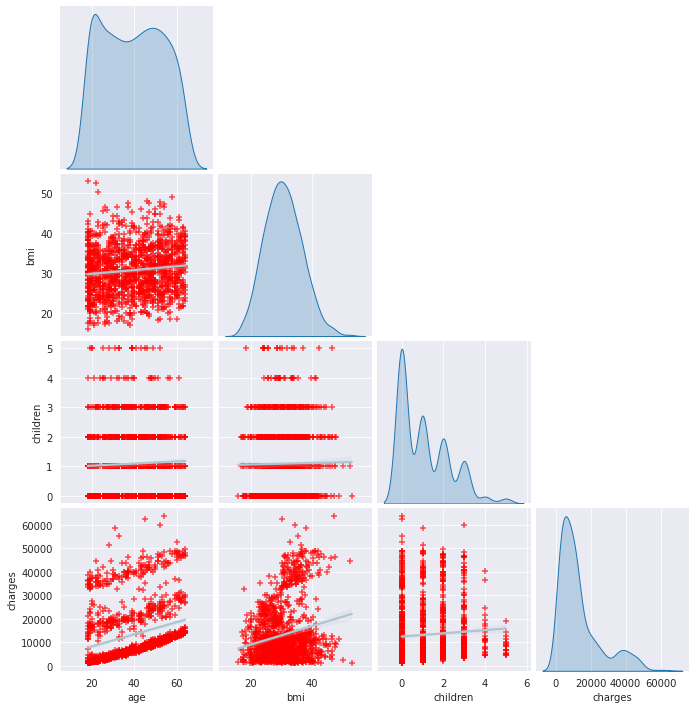

In [ ]:
# Using Pairplot for numerical values:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'red'}},
                 corner=True);

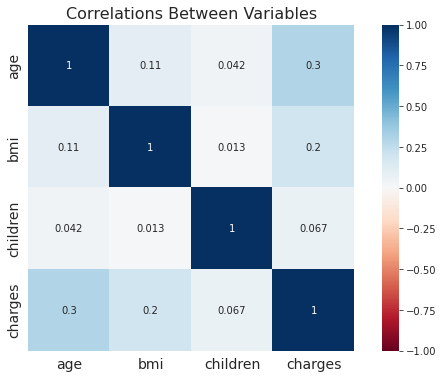

In [ ]:
# 4.Multivariate Analysis:
# WE will use .corr() method combined with heat map
# To check the relationship between numeric values
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True,square = True, 
            cmap = 'RdBu', vmax = 1, vmin = -1)
plt.title('Correlations Between Variables', size = 16)
plt.xticks(size =14)
plt.yticks(size = 14)
plt.show()

The heatmap shows us there is a correlation between age and charges. As the age increases insurance charges also increase or vice versa.
We can also see that there is a weak correlation between BMI and charges.
There is almost no relationship between children and charges. 

## 6.Conclusion
The main purpose of EDA is to help understand data before making any assumptions. EDA helps us to see distribution, summary statistics, relationships between variables and outliers.